### Problem Statement:

The Goal of this Projet is to give people an estimate of how much they need based on their individual health stituation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather than ineffective part.

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [2]:
# Logging operation

logging.basicConfig(filename='Jupyter_Notebook_logs.log', level=logging.INFO,
                    format='%(levelname)s:%(asctime)s:%(message)s')

In [3]:
# importing dataset

data = pd.read_csv(r'C:\Users\sushi\Data Science\iNeuron\Internship project\Insurance Premium Prediction update\dataset\insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# checking the dimensions of the dataframe

data.shape

(1338, 7)

In [5]:
# Checking missing value in dataset

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
# Checking number of unique elements in the columns

data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [7]:
# Checking how much memory each column uses in bytes

data.memory_usage()

Index         128
age         10704
sex         10704
bmi         10704
children    10704
smoker      10704
region      10704
expenses    10704
dtype: int64

In [8]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Column Children should be object column

data['children'] = data['children'].astype('object')

In [10]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [11]:
# Checking the statistical aspects of the dataframe

data.describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [12]:
# Logging operation

logging.info('model checks are done')

## Data Visualization

- Univariate analysis

In [13]:
# Selecting numerical columns

num_cols = data.select_dtypes(exclude = 'object')
num_cols.columns

Index(['age', 'bmi', 'expenses'], dtype='object')

In [14]:
# Selecting categorical columns
cat_cols = data.select_dtypes(include = 'object')

cat_cols.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

<Figure size 1080x432 with 0 Axes>

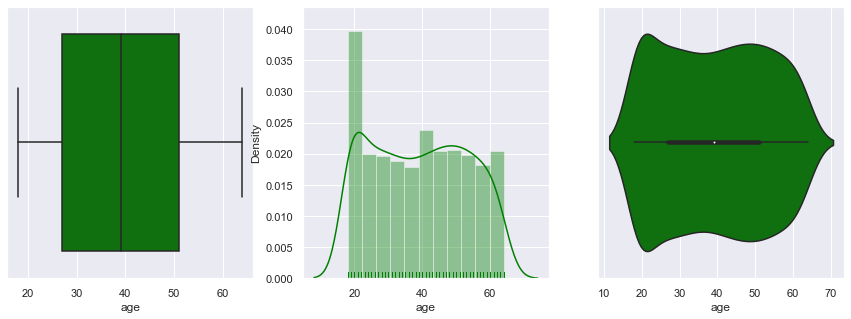

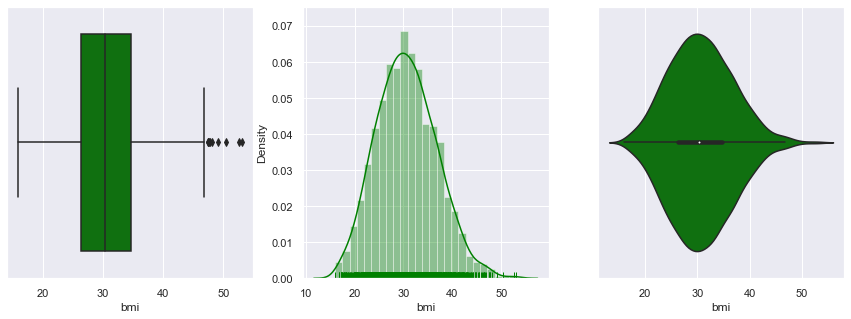

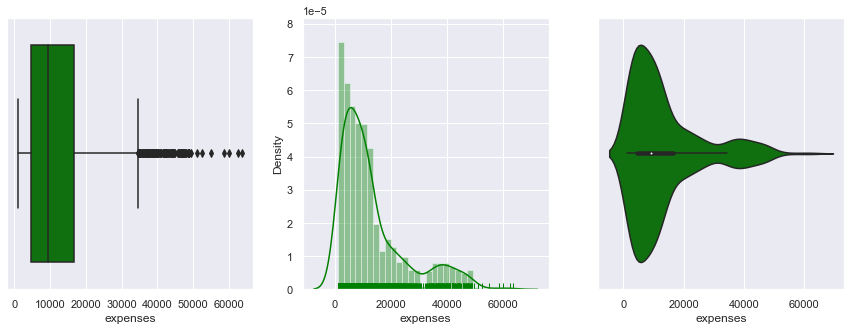

In [15]:
# Plotting numerical columns individually

plt.figure(figsize = (15,6))
f_num = num_cols.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(num_cols[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num_cols[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num_cols[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()

<Figure size 1080x720 with 0 Axes>

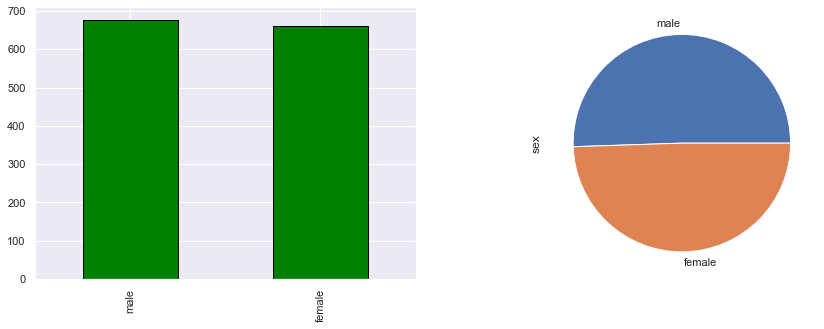

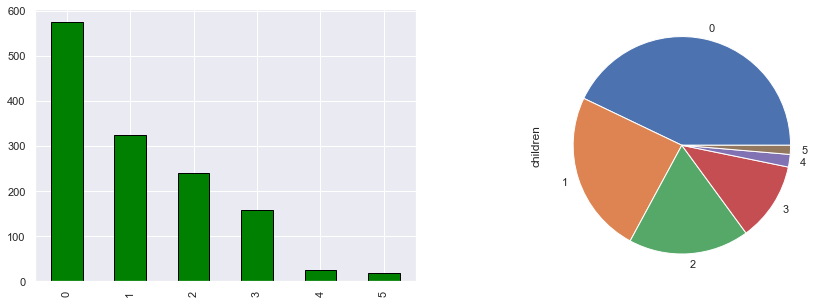

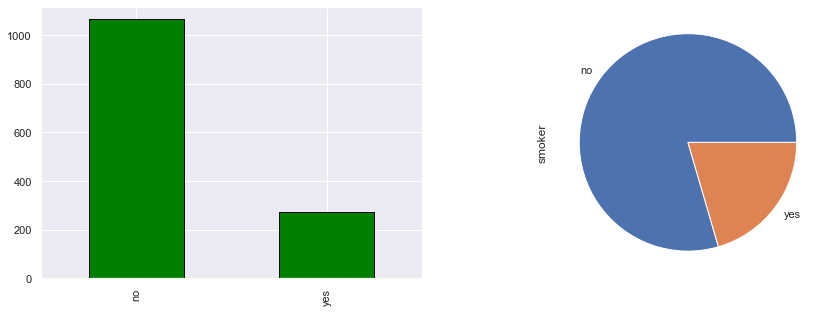

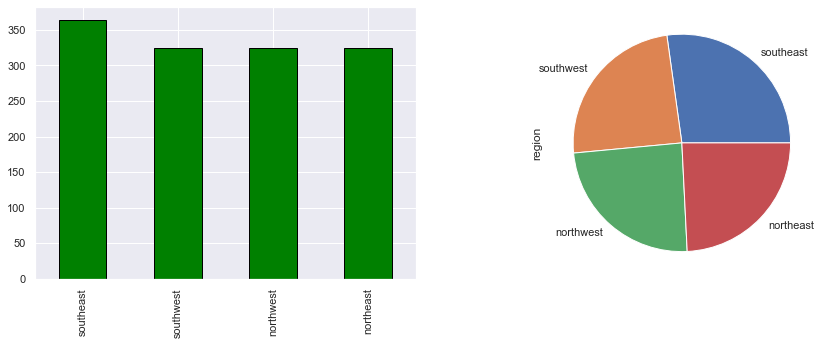

In [16]:
# Plotting categorical columns

plt.figure(figsize = (15,10))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    cat_cols[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    cat_cols[i[1]].value_counts().plot.pie()
    
    
    plt.show()

## Outlier detection

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [18]:
# Checking quntile values 

for i in num_cols.columns:
    print(i)
    print(num_cols[i].quantile([0.1,0.9,0.95,0.99]))
    print(num_cols[i].describe())
    print('\n')

age
0.10    19.0
0.90    59.0
0.95    62.0
0.99    64.0
Name: age, dtype: float64
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


bmi
0.10    23.000
0.90    38.630
0.95    41.100
0.99    46.389
Name: bmi, dtype: float64
count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64


expenses
0.10     2346.5350
0.90    34831.7160
0.95    41181.8260
0.99    48537.4806
Name: expenses, dtype: float64
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64




### Inferences:
No need of outlier treatment

In [19]:
# Logging opertation

logging.info('Outlier treatment done')

## Data Visualization
- Bivariate analysis of Numerical columns w.r.t. target column expenses

<Figure size 1080x720 with 0 Axes>

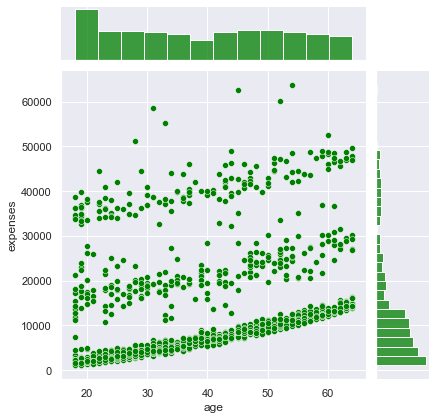

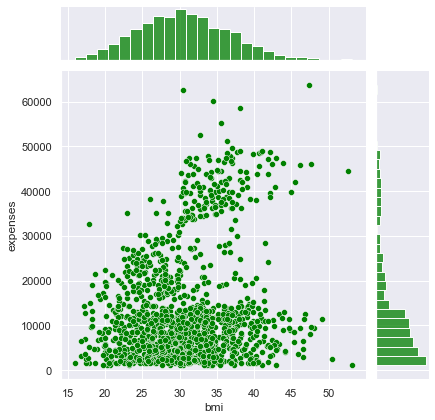

In [20]:
# Plotting numerical columns vs. Target column-expenses

plt.figure(figsize = (15,10))

f_num = num_cols.columns[:-1]

for i in enumerate(f_num):

    sns.jointplot(num_cols[i[1]], y= data.expenses, color= 'Green', kind = 'scatter')
    plt.show()


## Data Visualization
- Bivariate analysis of categorical columns w.r.t. target column expenses

<Figure size 1080x576 with 0 Axes>

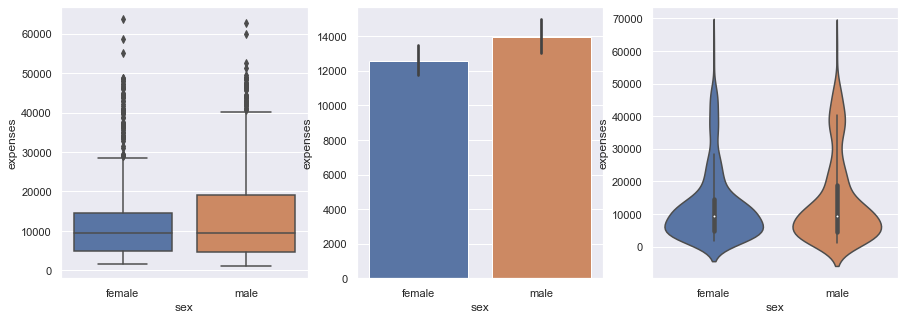

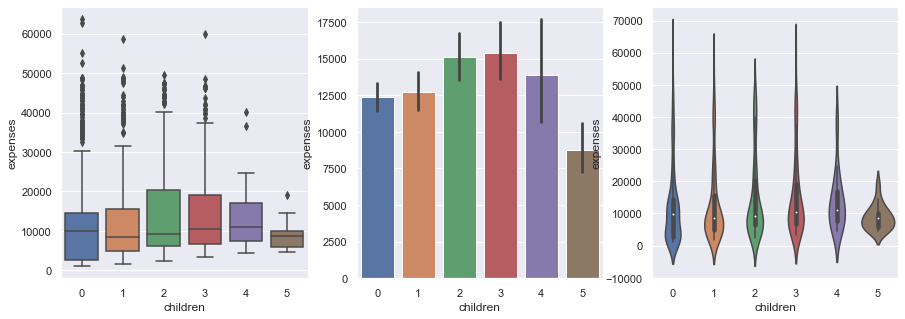

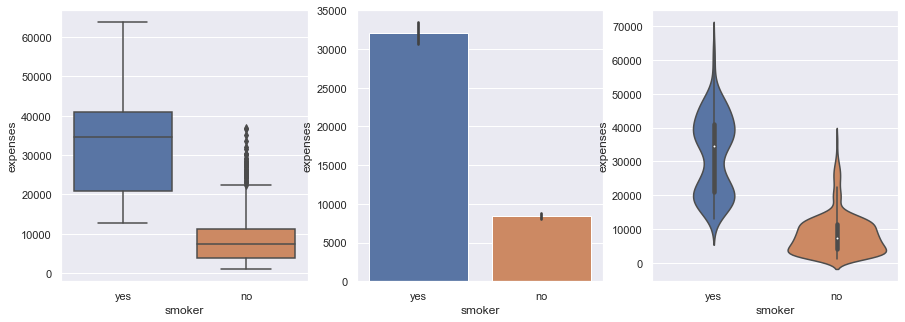

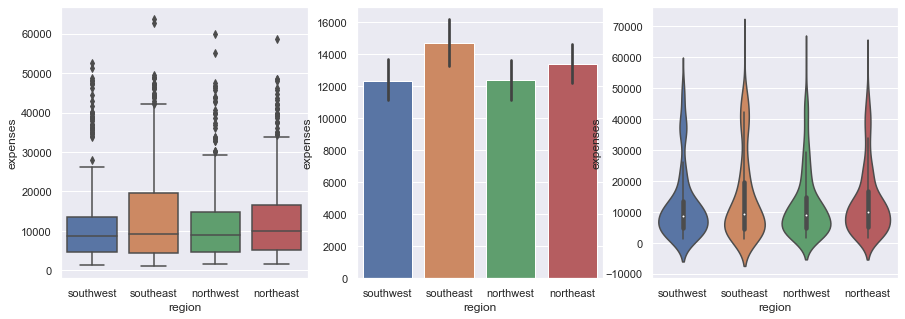

In [21]:
# Plotting categorical columns vs. Target column-expenses

plt.figure(figsize = (15,8))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = cat_cols[i[1]], y= data.expenses)

    ax1 = f.add_subplot(132)
    sns.barplot(x = cat_cols[i[1]], y= data.expenses)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = cat_cols[i[1]], y= data.expenses, orient= 'vertical')
    
    plt.show()

## Data Visualization
- Multivariate analysis

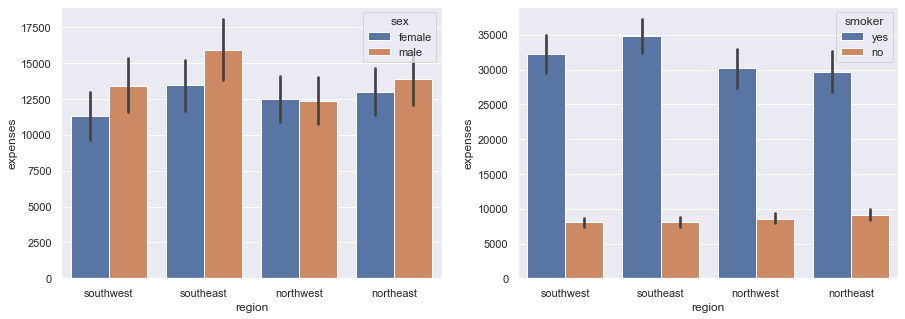

In [22]:
# Plotting region vs. expenses vs. sex

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.region, data.expenses, hue = data.sex)

ax1 = f.add_subplot(122)
sns.barplot(data.region, data.expenses, hue = data.smoker)
plt.show()

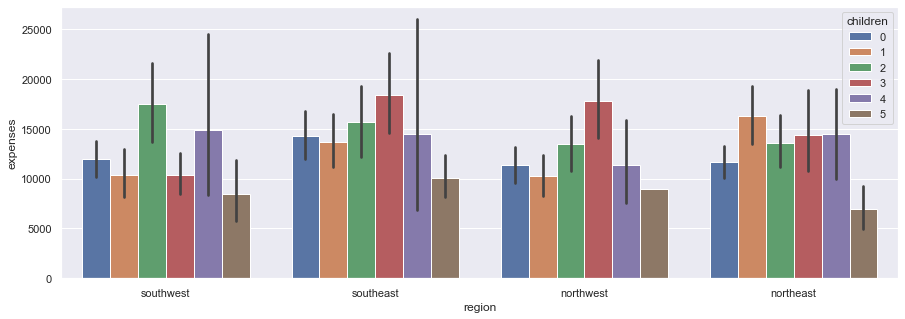

In [23]:
# Plotting region vs. expenses vs. children

plt.figure(figsize=(15,5))
sns.barplot(data.region, data.expenses, hue = data.children)
plt.show()

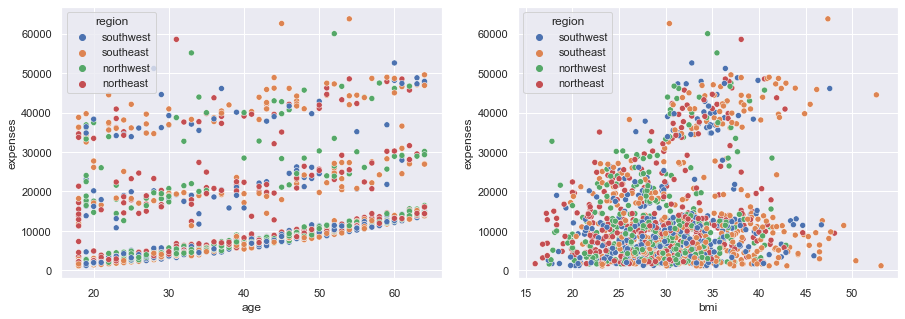

In [24]:
# Plotting age vs. expenses vs. region
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(data.age, data.expenses, hue = data.region)

# Plotting bmi vs. expenses vs. region
ax1 = f.add_subplot(122)
sns.scatterplot(data.bmi, data.expenses, hue = data.region)
plt.show()

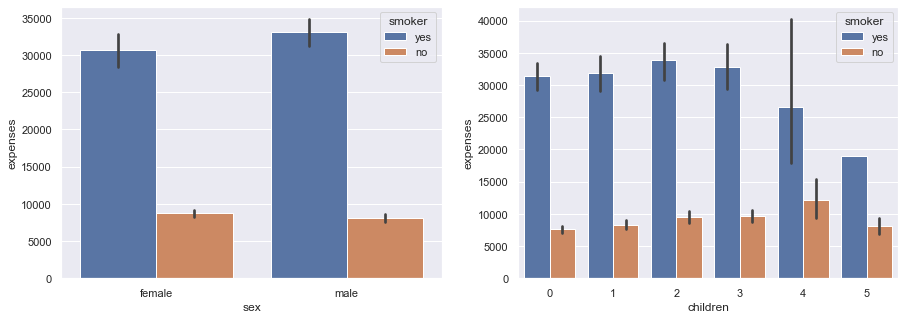

In [25]:
# Plotting sex vs. expenses vs. smoker

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.sex, data.expenses, hue = data.smoker)

# Plotting childreb vs. expenses vs. smoker
ax1 = f.add_subplot(122)
sns.barplot(data.children, data.expenses, hue = data.smoker)
plt.show()

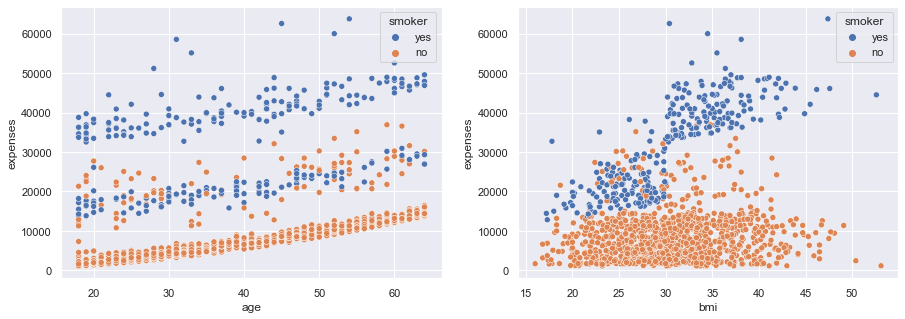

In [26]:
# Plotting age vs. expenses vs. smoker

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(data.age, data.expenses, hue = data.smoker)

# Plotting bmi vs. expenses vs. smoker
ax1 = f.add_subplot(122)
sns.scatterplot(data.bmi, data.expenses, hue = data.smoker)
plt.show()

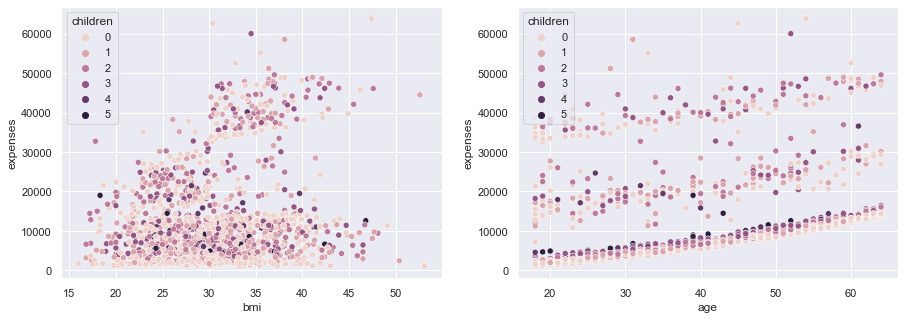

In [27]:
# Plotting bmi vs. expenses vs. children

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
sns.scatterplot(data.bmi, data.expenses, hue = data.children)

# Plotting age vs. expenses vs. children
ax2 = f.add_subplot(122)
sns.scatterplot(data.age, data.expenses, hue = data.children)
plt.show()

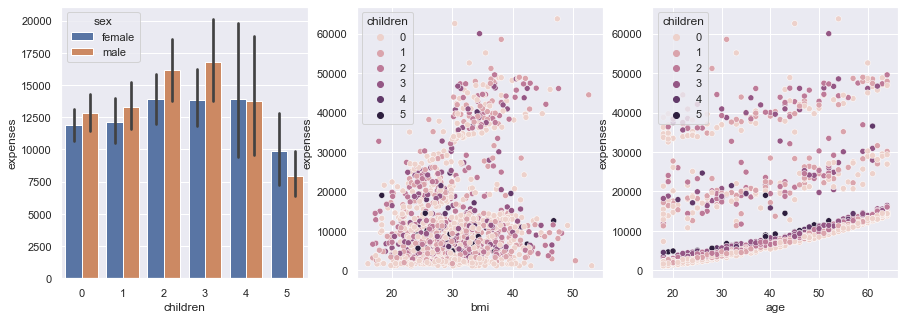

In [28]:
# Plotting children vs. expenses vs. sex
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
sns.barplot(data.children, data.expenses, hue = data.sex)

# Plotting bmi vs. expenses vs. children
ax1 = f.add_subplot(132)
sns.scatterplot(data.bmi, data.expenses, hue = data.children)

# Plotting age vs. expenses vs. children
ax2 = f.add_subplot(133)
sns.scatterplot(data.age, data.expenses, hue = data.children)
plt.show()

## Target Variable- Expenses

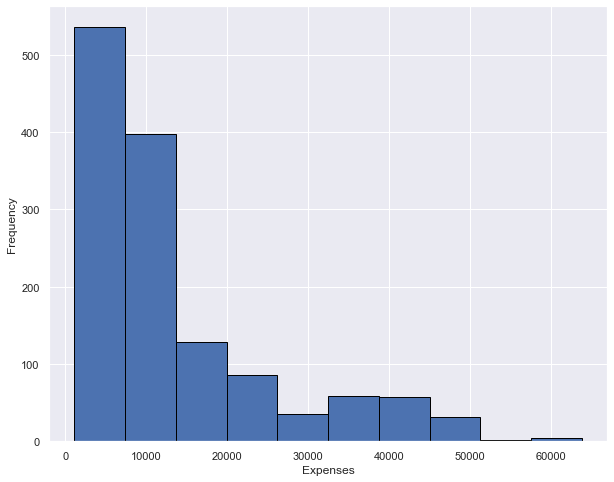

In [29]:
# Plotting target variable - Expenses

plt.figure(figsize = (10,8))
plt.hist(data['expenses'], edgecolor = 'black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

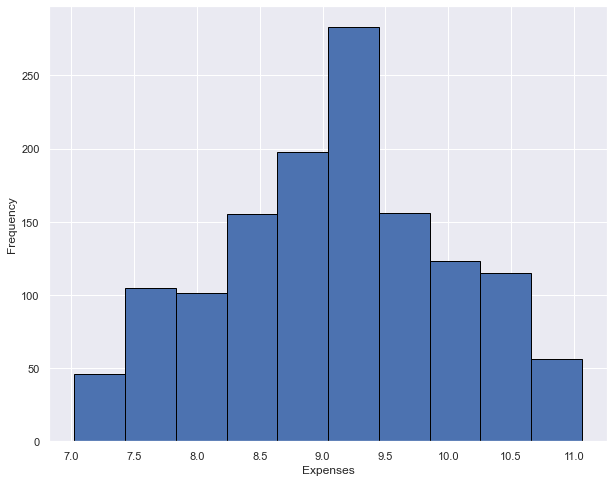

In [30]:
# Using log Transformation

data['expenses'] = np.log1p(data['expenses'])

# Plotting histogram

plt.figure(figsize = (10,8))
plt.hist(data['expenses'], edgecolor = 'black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

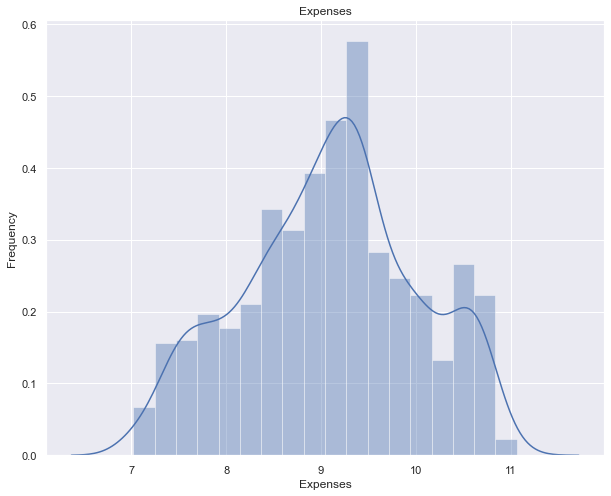

In [31]:
# # Plotting target variable - Expenses

plt.figure(figsize = (10,8))
p = sns.distplot(data['expenses'],kde=True)
p = plt.title('Expenses')
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

## Feature Engineering

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,9.734235
1,18,male,33.8,1,no,southeast,7.453880
2,28,male,33.0,3,no,southeast,8.400763
3,33,male,22.7,0,no,northwest,9.998137
4,32,male,28.9,0,no,northwest,8.260457


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [34]:
# Column sex
sex_dummies = pd.get_dummies(data.sex, drop_first= True)

data = pd.concat([data, sex_dummies], axis = 1)

# Column children
children_dummies = pd.get_dummies(data.children,prefix = 'Children', drop_first= True)

data = pd.concat([data, children_dummies], axis = 1)

# Column smoker
smoker_dummies = pd.get_dummies(data.smoker,prefix = 'Smoker', drop_first= True)

data = pd.concat([data, smoker_dummies], axis = 1)

# Column region
region_dummies = pd.get_dummies(data.region,prefix = 'region', drop_first= True)

data = pd.concat([data, region_dummies], axis = 1)

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,southwest,9.734235,0,0,0,0,0,0,1,0,0,1
1,18,male,33.8,1,no,southeast,7.453880,1,1,0,0,0,0,0,0,1,0
2,28,male,33.0,3,no,southeast,8.400763,1,0,0,1,0,0,0,0,1,0
3,33,male,22.7,0,no,northwest,9.998137,1,0,0,0,0,0,0,1,0,0
4,32,male,28.9,0,no,northwest,8.260457,1,0,0,0,0,0,0,1,0,0


In [37]:
data=data.drop('sex', axis=1)
data=data.drop('children', axis=1)
data=data.drop('smoker', axis=1)
data=data.drop('region', axis=1)
data.head()

,age,bmi,expenses,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,9.734235,0,0,0,0,0,0,1,0,0,1
1,18,33.8,7.453880,1,1,0,0,0,0,0,0,1,0
2,28,33.0,8.400763,1,0,0,1,0,0,0,0,1,0
3,33,22.7,9.998137,1,0,0,0,0,0,0,1,0,0
4,32,28.9,8.260457,1,0,0,0,0,0,0,1,0,0


In [38]:
logging.info('Feature engineering done')

## Data Visualization
- Pairplot & Heatmap

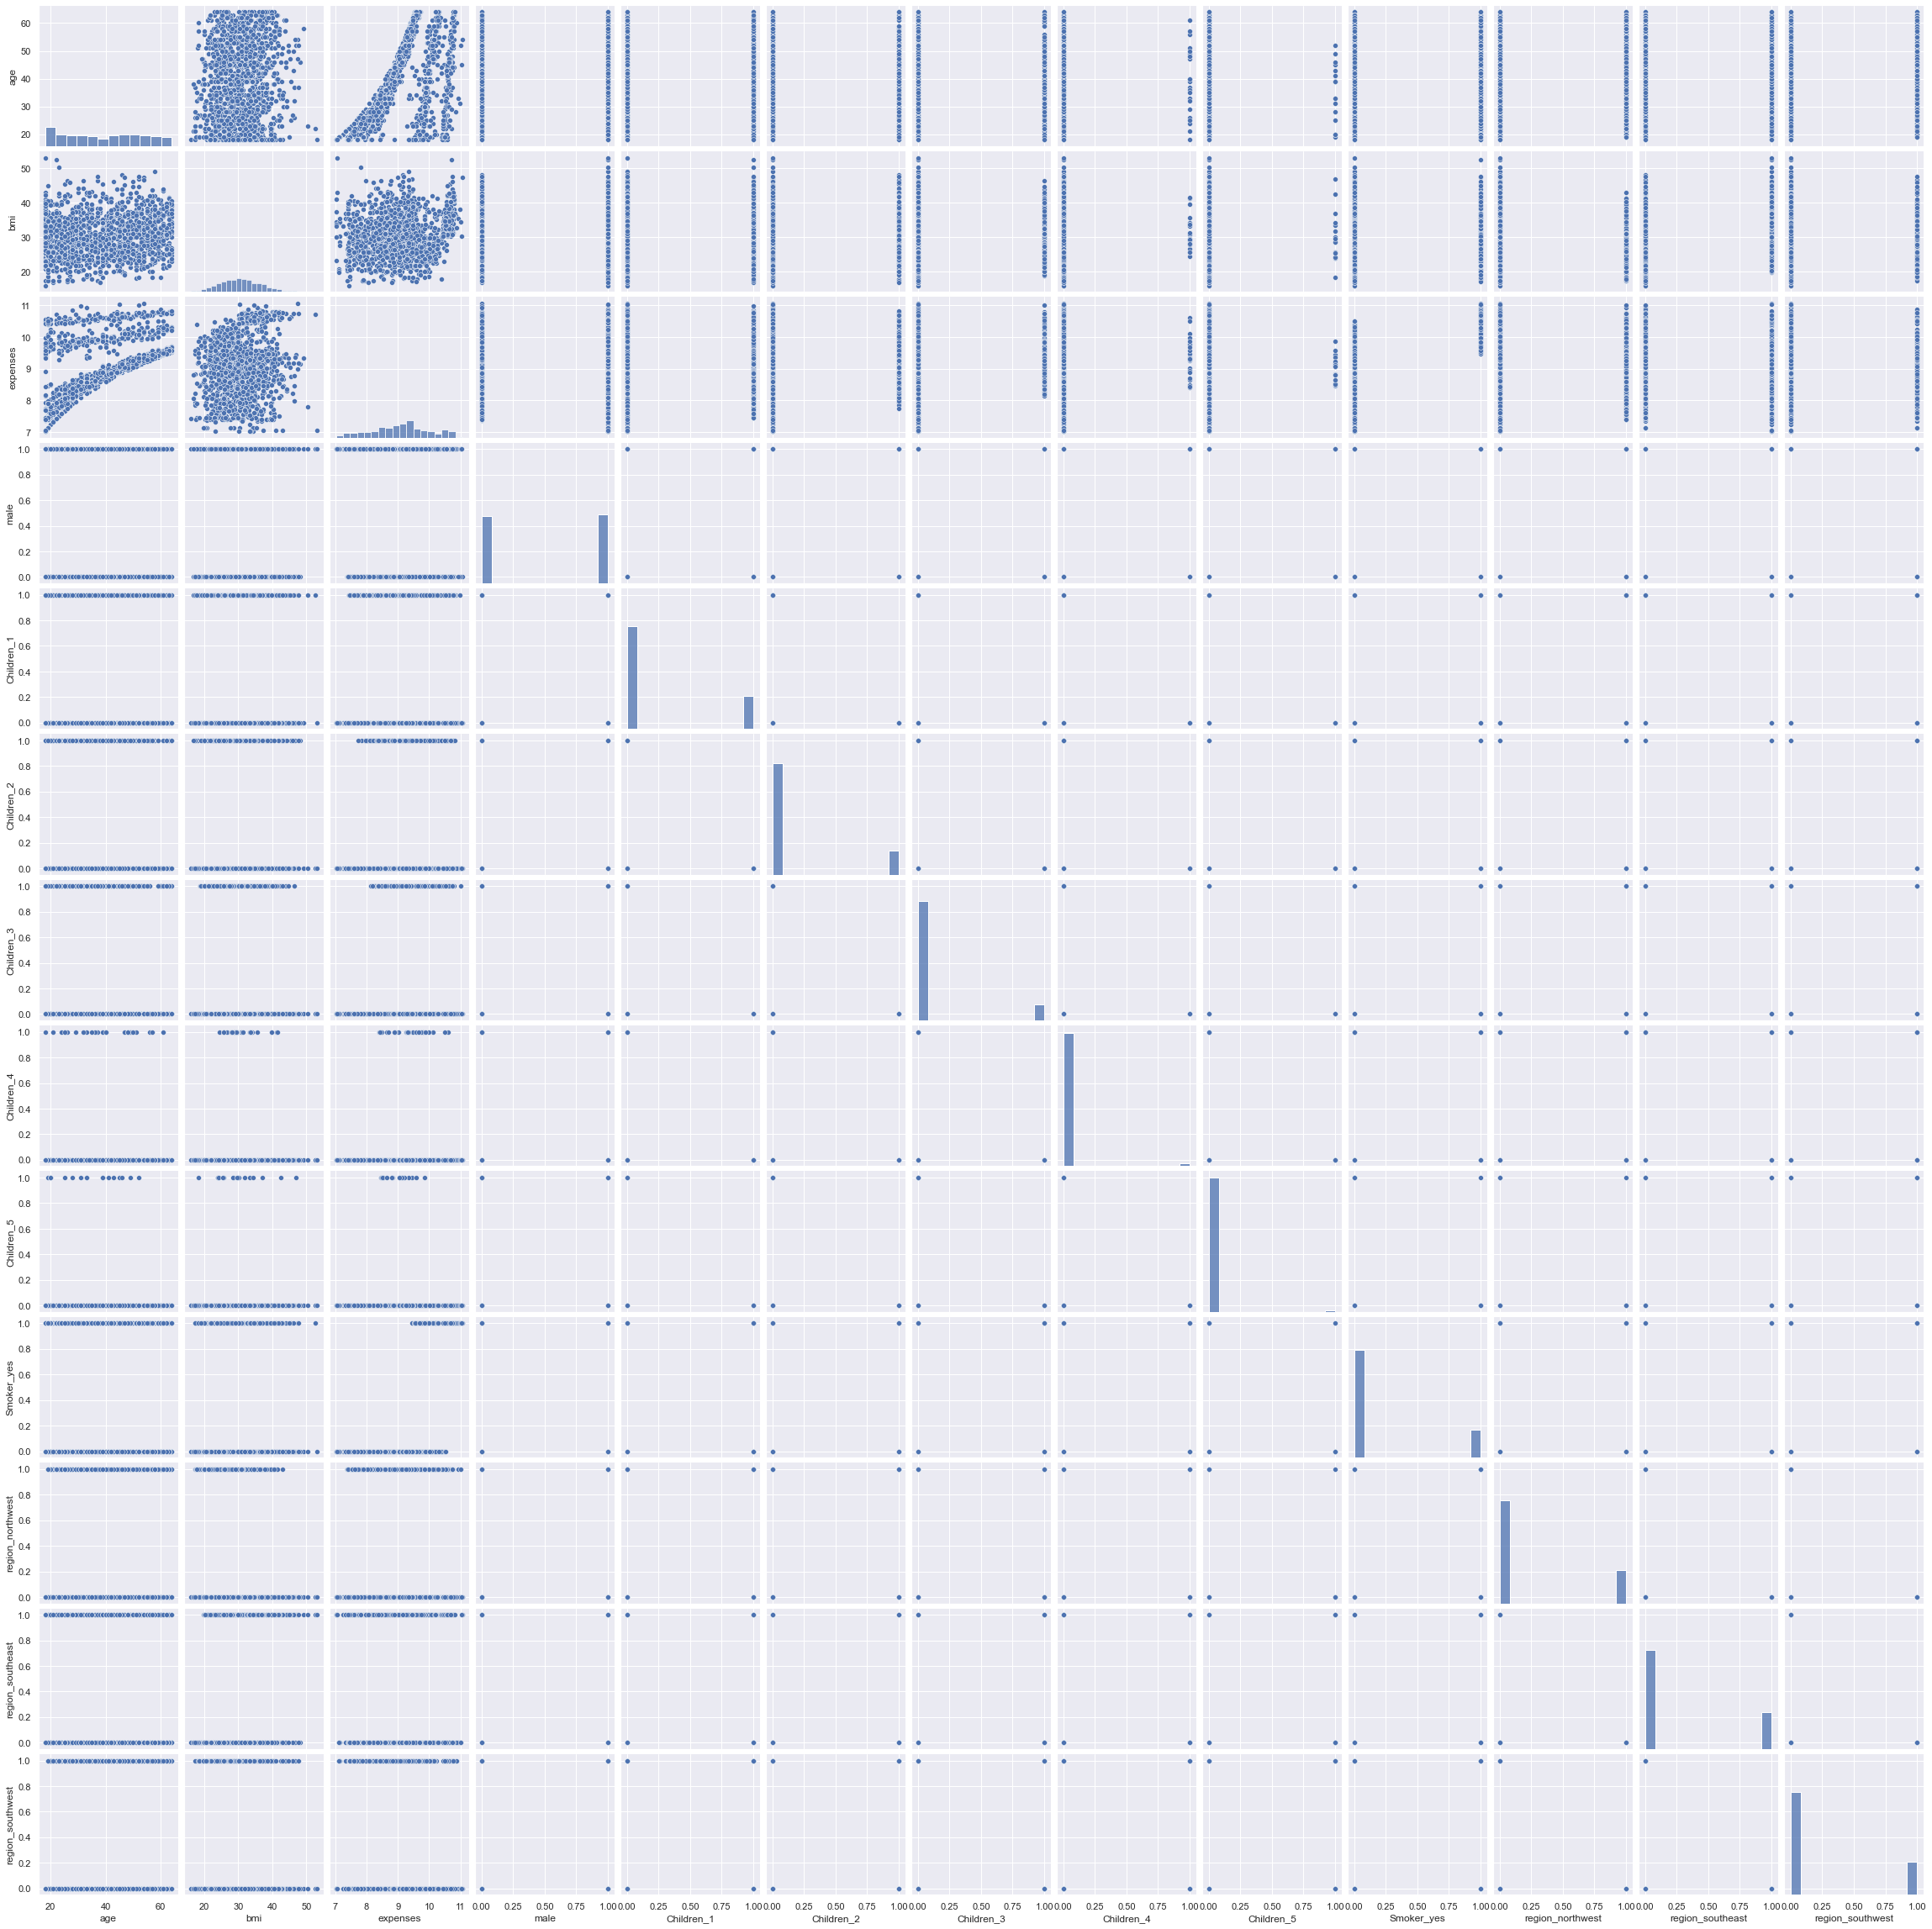

In [39]:
#Plotting pair plot

sns.pairplot(data)
plt.show()

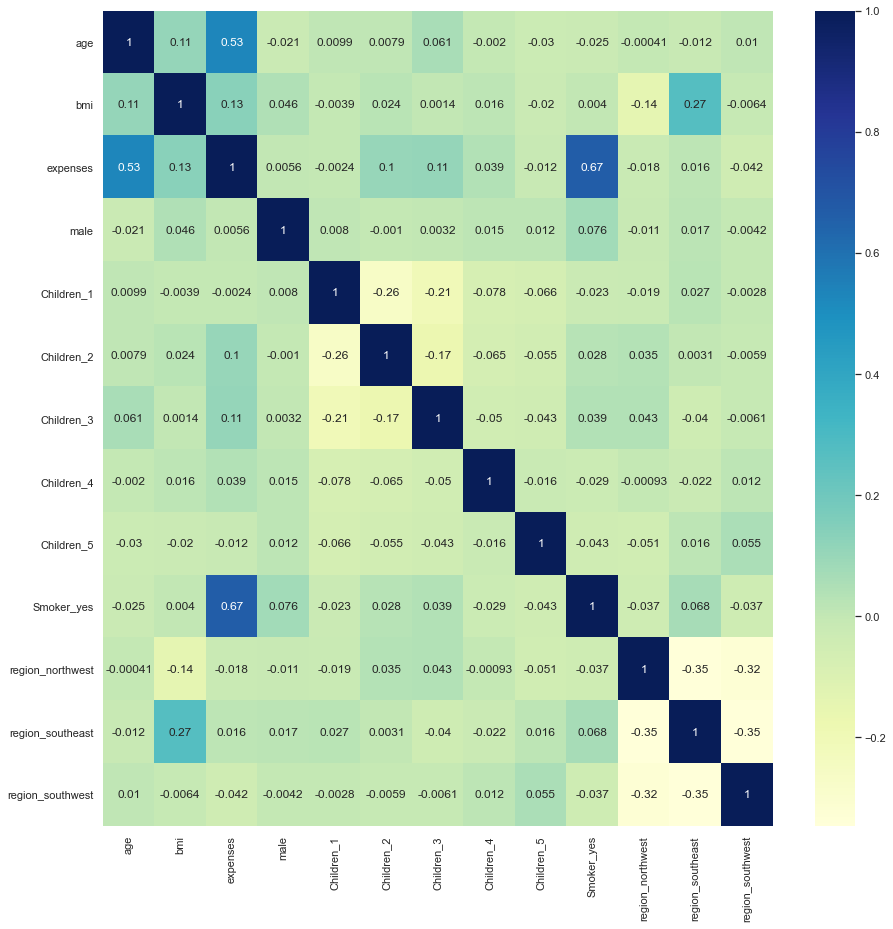

In [42]:
# Plotting Pearson Correlation matrix

plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot = True)
plt.show()

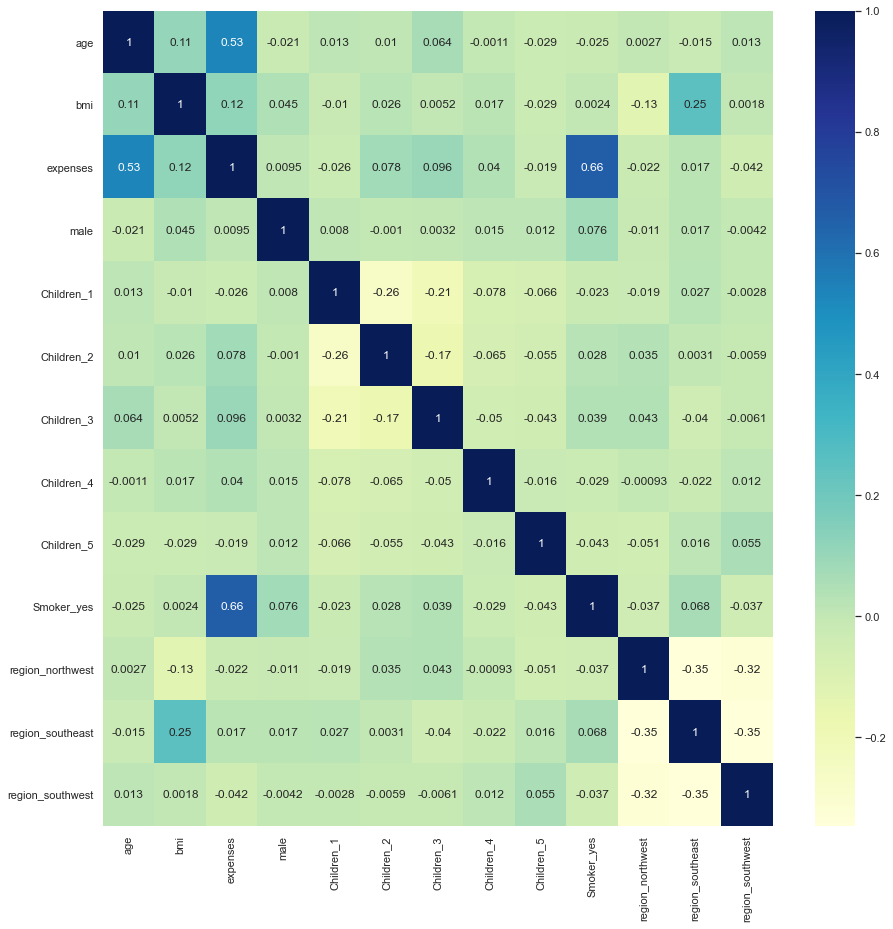

In [43]:
# Plotting Spearman Correlation matrix

plt.figure(figsize = (15,15))
sns.heatmap(data.corr(method = 'spearman'), cmap= 'YlGnBu', annot = True)
plt.show()

### Inferences:
- Smoker_yes and age are positively correlated with target variable Expenses
- bmi and region_southwest are positively correlated.
- bmi and age are positively correlated.

In [44]:
logging.info('Data Visualization done')

## Train Test Split

In [45]:
# Importing Sklearn library for train_test_split

from sklearn.model_selection import train_test_split

In [46]:
# Splitting dataset into train and test with train size 0.7

df_train, df_test = train_test_split(data, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(936, 13)
(402, 13)


In [47]:
# Checking numerical columns for scaling.

df_train.describe()

,age,bmi,expenses,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,39.075855,30.796581,9.085515,0.497863,0.236111,0.184829,0.117521,0.021368,0.011752,0.194444,0.244658,0.282051,0.242521
std,14.078983,6.211413,0.923870,0.500263,0.424918,0.388366,0.322213,0.144683,0.107826,0.395984,0.430114,0.450239,0.428837
min,18.000000,16.000000,7.023643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.275000,8.427401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.500000,9.131947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,35.025000,9.710336,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.100000,11.063061,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_test.describe()

,age,bmi,expenses,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,39.512438,30.360199,9.129826,0.522388,0.256219,0.166667,0.116915,0.012438,0.017413,0.228856,0.238806,0.248756,0.243781
std,13.994872,5.822817,0.909223,0.500121,0.437088,0.373142,0.321720,0.110967,0.130967,0.420620,0.426885,0.432831,0.429897
min,18.000000,16.800000,7.032192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.300000,8.502021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.200000,9.188566,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.750000,33.900000,9.745416,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,49.100000,11.002473,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
logging.info('Train Test Split for linear regression done')

##  Feature Scaling

In [50]:
# Importing Sklearn library for StandardScaler

from sklearn.preprocessing import MinMaxScaler

In [51]:
# Instantiate an object

scaler = MinMaxScaler()

df_train_sc = scaler.fit_transform(df_train)

df_test_sc = scaler.transform(df_test)

In [52]:
df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
df_train_sc.head()

,age,bmi,expenses,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
0,0.717391,0.237197,0.757745,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.717391,0.482480,0.538033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.565217,0.633423,0.451256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.239130,0.409704,0.311050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434783,0.358491,0.433122,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
df_test_sc.head()

,age,bmi,expenses,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
0,0.108696,0.495957,0.120623,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.217391,0.309973,0.715137,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.565217,0.312668,0.467539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.043478,0.417790,0.127448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.247978,0.650140,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Defining X_train & y_train for model building

In [54]:
# Defining the X_train, y_train

y_train_sc = df_train_sc['expenses']
X_train_sc = df_train_sc.drop('expenses',axis=1)
y_test_sc = df_test_sc['expenses']
X_test_sc = df_test_sc.drop('expenses',axis=1)

In [55]:
X_train_sc.head()

,age,bmi,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
0,0.717391,0.237197,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.717391,0.482480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.565217,0.633423,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.239130,0.409704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434783,0.358491,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
y_train_sc.head()

0    0.757745
1    0.538033
2    0.451256
3    0.311050
4    0.433122
Name: expenses, dtype: float64

## Linear Regression

### Feature selection using Backward Elimination

Fitting a regression line through the training data using `statsmodels`.
by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using `sm.add_constant(X)`.


In [57]:
# Importng statsmodels library for api

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [58]:
# Linear model for X_train

X_train_lr = sm.add_constant(X_train_sc)

X_train_lr.head()

,const,age,bmi,male,Children_1,Children_2,Children_3,Children_4,Children_5,Smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.717391,0.237197,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.717391,0.482480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.565217,0.633423,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.239130,0.409704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.434783,0.358491,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
# Checking dimensions of y_train

y_train_sc.shape

(936,)

In [60]:
# Training OLS model

lr_sm = sm.OLS(y_train_sc,X_train_lr).fit()

In [61]:
# Checking p-values

round(lr_sm.pvalues,4)

const               0.0000
age                 0.0000
bmi                 0.0000
male                0.0043
Children_1          0.0014
Children_2          0.0000
Children_3          0.0000
Children_4          0.0000
Children_5          0.0005
Smoker_yes          0.0000
region_northwest    0.0832
region_southeast    0.0002
region_southwest    0.0016
dtype: float64

In [62]:
#Backward Elimination 

cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['age', 'bmi', 'male', 'Children_1', 'Children_2', 'Children_3', 'Children_4', 'Children_5', 'Smoker_yes', 'region_southeast', 'region_southwest']


In [63]:
# Training X_train and y_train with selected features

X_train_be = X_train_sc[selected_features_BE]
X_test_be = X_test_sc[selected_features_BE]

In [64]:
# Building a linear regression model
lr = LinearRegression()

# Fitting
lr.fit(X_train_be,y_train_sc)

# Predictions
y_pred_train_be = lr.predict(X_train_be)

y_pred_test_be = lr.predict(X_test_be)

In [65]:
#Check R2 score, rmse

from sklearn.metrics import r2_score,mean_squared_error

In [66]:
# Function for adjusted r2_score

def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [67]:
#function for rmse

def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [68]:
#Evaluation 

print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.7587886656881931
Adj. R2 score of train data is  0.7559171021844812
rmse score of train data is  0.11226878359659552

R2 score of test data is  0.7937752645910986
Adj. R2 score of train data is  0.787958669489822
rmse score of test data is  0.10208952995930254


In [69]:
#Storing results

results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.10209


### Feature selection using RFE ( Recursive Feature Elimination)

In [70]:
from sklearn.feature_selection import RFE

# Features

features = X_train_sc.columns.tolist()

nof_list = np.arange(1,len(features)+1)   

high_score=0

# Variable to store the optimum features

nof=0  

score_list =[]

for n in range(len(nof_list)):
    
    lr = LinearRegression()
    rfe = RFE(lr,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)
    X_test_rfe = rfe.transform(X_test_sc)
    lr.fit(X_train_rfe,y_train_sc)
    score = lr.score(X_test_rfe,y_test_sc)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.793955


In [71]:
#RFE with 8 features

lr = LinearRegression()

rfe = RFE(lr,8)

X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)

X_test_rfe = rfe.transform(X_test_sc)

#Fitting the data to model

lr.fit(X_train_rfe,y_train_sc)  

temp = pd.Series(rfe.support_,index = features)

selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['age', 'bmi', 'Children_1', 'Children_2', 'Children_3', 'Children_4',
       'Children_5', 'Smoker_yes'],
      dtype='object')


In [72]:
#predictions
y_pred_train_rfe = lr.predict(X_train_rfe)
y_pred_test_rfe = lr.predict(X_test_rfe)

In [73]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_rfe))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_rfe))

R2 score of train data is  0.7533405252011638
Adj. R2 score of train data is  0.7512118565944856
rmse score of train data is  0.11352958828492671

R2 score of test data is  0.7890403099118453
Adj. R2 score of train data is  0.7847459650754451
rmse score of test data is  0.1032548751961863


In [74]:
#Storing results
results.loc[len(results)] = ['Linear Regression_RFE',r2_score(y_train_sc,y_pred_train_rfe),
                             adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe),
                             rmse(y_train_sc,y_pred_train_rfe),r2_score(y_test_sc,y_pred_test_rfe),
                             adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe),rmse(y_test_sc,y_pred_test_rfe)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255


### Feature selection using Lasso CV

In [75]:
#Using Lasso regression CV

from sklearn.linear_model import LassoCV

reg = LassoCV()

reg.fit(X_train_sc, y_train_sc)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

print("Best score using built-in LassoCV: %f" %reg.score(X_train_sc,y_train_sc))

coef = pd.Series(reg.coef_, index = X_train_sc.columns)

Best alpha using built-in LassoCV: 0.000059
Best score using built-in LassoCV: 0.759549


In [76]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

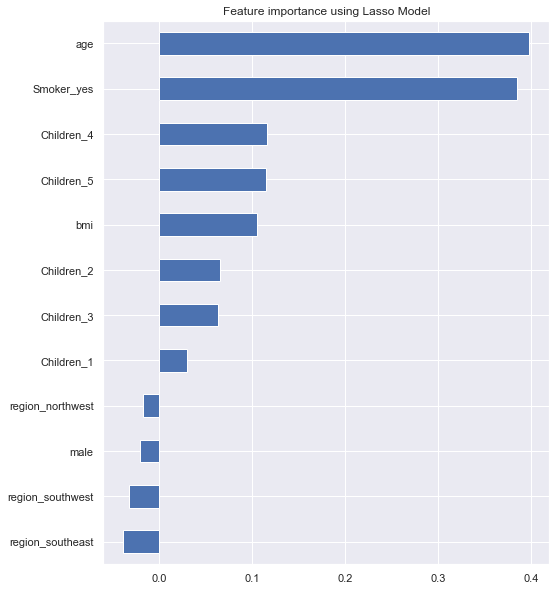

In [77]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind = "barh")

plt.title("Feature importance using Lasso Model")

In [78]:
features_by_lasso = ['age', 
                     'Smoker__yes',
                     'children',
                     'bmi',
                     'region__northwest',
                     'male',
                     'region__southwest',
                     'region__southeast']

In [79]:
#predictions on train data

y_pred_train_ls = reg.predict(X_train_sc)

#predictions on test data

y_pred_test_ls = reg.predict(X_test_sc)

In [80]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ls))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ls))

R2 score of train data is  0.759549047998374
Adj. R2 score of train data is  0.7564229251121123
rmse score of train data is  0.11209168872598096

R2 score of test data is  0.7939548555095768
Adj. R2 score of train data is  0.7875987070934197
rmse score of test data is  0.10204506791701858


In [81]:
results.loc[len(results)] = ['Linear Regression_Lasso',r2_score(y_train_sc,y_pred_train_ls),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls),
                             rmse(y_train_sc,y_pred_train_ls),r2_score(y_test_sc,y_pred_test_ls),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls),rmse(y_test_sc,y_pred_test_ls)]

results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045


In [82]:
logging.info('Entered the Elastic_Net_CV method of the Embedded_method_for_feature_selection class.')

In [83]:
from sklearn.linear_model import ElasticNetCV

# Instantiating ElasticNetCV
ECV = ElasticNetCV() 

# fitting on the training data
ECV.fit(X_train_sc, y_train_sc)  

# feature importance by ElasticNetCV
Coef = pd.Series(ECV.coef_, index=X_train_sc.columns)  

imp_Coef_elastic = Coef.sort_values(ascending=False)

Text(0.5, 1.0, 'Feature importance using ElasticNetCV Model')

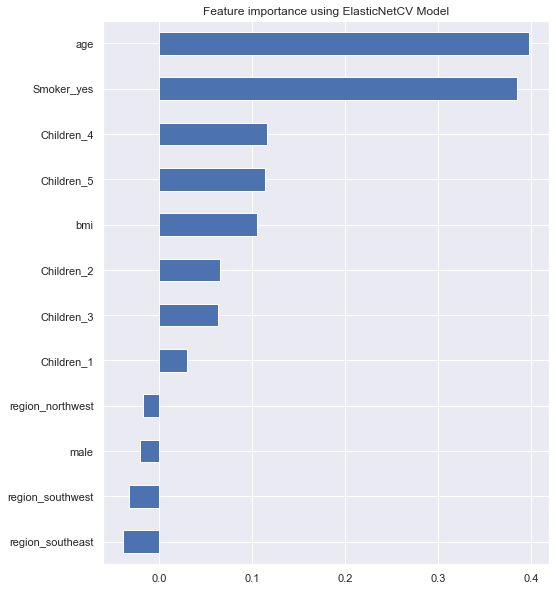

In [84]:
#Visualization

imp_Coef_elastic = Coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_Coef_elastic.plot(kind = "barh")

plt.title("Feature importance using ElasticNetCV Model")

In [85]:
features_by_lasso = ['age', 
                     'bmi',
                     'children',
                     'male',
                     'Smoker__yes',
                     'region__northwest',
                     'region__southeast',
                     'region__southwest']

In [86]:
# predictions on the data
y_pred_train_ECV = ECV.predict(X_train_sc)  
y_pred_test_ECV = ECV.predict(X_test_sc)  

In [87]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ECV))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ECV))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ECV))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ECV))

R2 score of train data is  0.7595440554282996
Adj. R2 score of train data is  0.7564178676332179
rmse score of train data is  0.11209285242007568

R2 score of test data is  0.7939621788143377
Adj. R2 score of train data is  0.7876062563098957
rmse score of test data is  0.10204325444605832


In [88]:
results.loc[len(results)] = ['Linear Regression_ElasticNetCV',
                             r2_score(y_train_sc,y_pred_train_ECV),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV),
                             rmse(y_train_sc,y_pred_train_ECV),
                             r2_score(y_test_sc,y_pred_test_ECV),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV),
                             rmse(y_test_sc,y_pred_test_ECV)]

results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045
3,Linear Regression_ElasticNetCV,0.759544,0.756418,0.112093,0.793962,0.787606,0.102043


### Residual Analysis

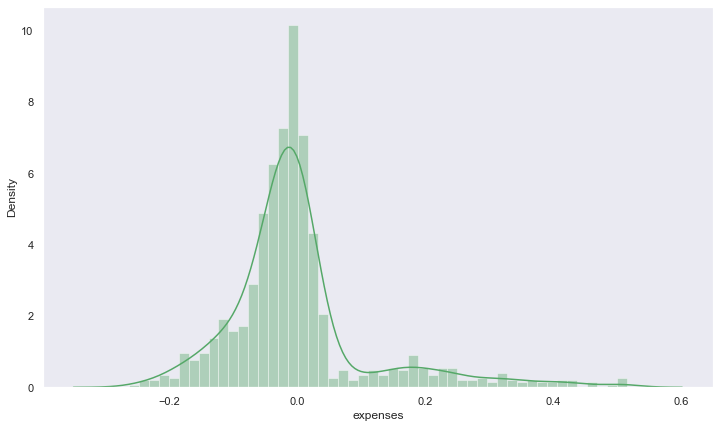

In [89]:
#check how error terms are distributed on train data
y_res = y_train_sc - y_pred_train_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

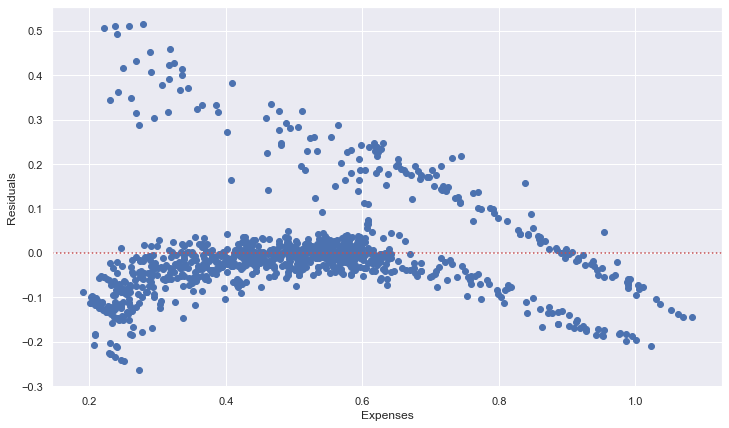

In [90]:
#residual vs predicitons plot

plt.figure(figsize=(12,7))
plt.scatter(y_pred_train_rfe, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Expenses")
plt.ylabel("Residuals")
plt.show()

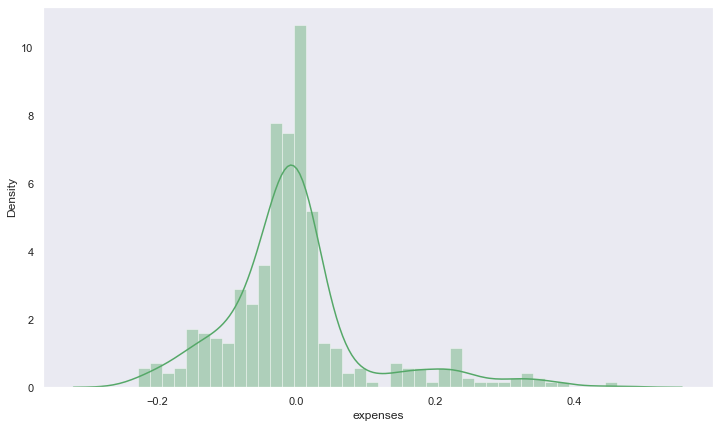

In [91]:
#check how error terms are distributed on test data
y_res = y_test_sc - y_pred_test_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

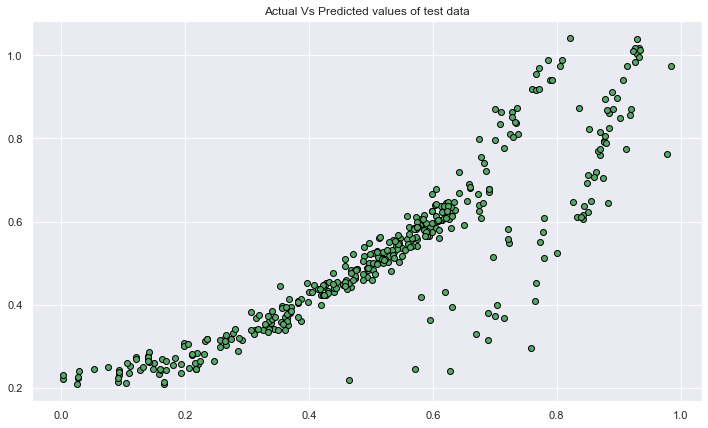

In [92]:
#actual test values vs predicted test values

plt.figure(figsize=(12,7))
plt.title('Actual Vs Predicted values of test data')
plt.scatter(y_test_sc, y_pred_test_rfe, color='g', edgecolor = 'Black')
plt.show()

### Inferences:
Our model is inline with the linear regression assumptions:-

- Non-Linear relationship exists between dependent variable and its each independent variable.
- error terms are in nearly normal distribution and are independent of each other.
- error terms nearly have constant variance (homoscedasticity).

## Decision Tree Regressor

In [93]:
# Importing decision tree regressor

from sklearn.tree import DecisionTreeRegressor

In [94]:
# Instantiating DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [95]:
#Splitting data set
y = data['expenses']
X = data.drop('expenses',axis=1)

In [96]:
#Train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)
print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,
                                                                                     y_train.shape,
                                                                                     X_test.shape,
                                                                                     y_test.shape))

The shapes of X_train = (936, 12), y_train = (936,), X_test = (402, 12),y_test = (402,)


In [97]:
# Importing Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10]}

# randomized search cv

RCV = RandomizedSearchCV(estimator=dt, 
                         param_distributions=params, 
                         n_iter = 10,  
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [98]:
# Best estimator
RCV.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [99]:
# Best parameters
RCV.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'mse'}

In [100]:
# Based on the above parameters, let's build a decision tree regressor

dt1 = RCV.best_estimator_
dt1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [101]:
# Feature importance

dt1.feature_importances_

array([0.42238162, 0.03740227, 0.        , 0.00132183, 0.00632437,
       0.0058353 , 0.0039565 , 0.        , 0.5227781 , 0.        ,
       0.        , 0.        ])

In [102]:
dt1_feature_imp = pd.DataFrame(dt1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

dt1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)

dt1_feature_imp

,Feature_importance
Smoker_yes,0.522778
age,0.422382
bmi,0.037402
Children_2,0.006324
Children_3,0.005835
Children_4,0.003957
Children_1,0.001322
male,0.000000
Children_5,0.000000
region_northwest,0.000000


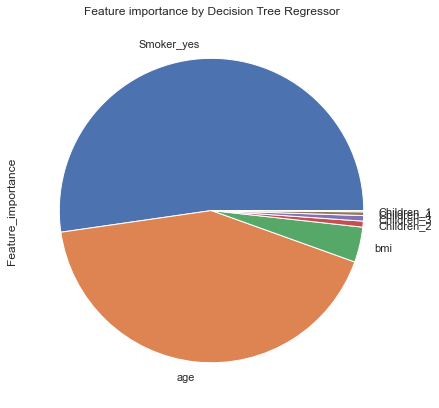

In [103]:
# Visualization

dt1_feature_imp['Feature_importance'].plot(kind='pie', 
                                           title = 'Feature importance by Decision Tree Regressor', 
                                           figsize=(12,7))

plt.show()

### Inference: 

- Here the last four features contribute none to the prediction of expenses. So, let's eliminate them and consider only those which are top 4.

In [106]:
top_features_dt1 = ['age','Smoker_yes','bmi','Children_2','Children_3','Children_4','Children_1']

In [107]:
# Instantiating

dt2 = DecisionTreeRegressor()

#Considering only the above features

X_train_dt = X_train[top_features_dt1]

X_test_dt = X_test[top_features_dt1]

In [108]:
# Using randomized search CV for finding out the best hyper parameters

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10]}

RCV = RandomizedSearchCV(estimator=dt2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_dt,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [109]:
# Best params

RCV.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'mse'}

In [110]:
# Best estimator

RCV.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [111]:
# Best score
RCV.best_score_

0.7970233428826927

In [112]:
# Building a decision tree regressor using the best params by the Randomized search CV

dt2 = RCV.best_estimator_

# Fitting on train data

dt2.fit(X_train_dt,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [113]:
# Predictions on train data

y_pred_train = dt2.predict(X_train_dt)

In [114]:
# Predictions on test data

y_pred_test = dt2.predict(X_test_dt)

In [115]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8328184116167445
Adj. R2 score of train data is  0.8315573436009226
rmse score of train data is  0.37640933308218893

R2 score of test data is  0.8197840295573594
Adj. R2 score of train data is  0.8165822229758912
rmse score of test data is  0.3884144676988352


In [116]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045
3,Linear Regression_ElasticNetCV,0.759544,0.756418,0.112093,0.793962,0.787606,0.102043
4,Decision tree regressor,0.832818,0.831557,0.376409,0.819784,0.816582,0.388414


## Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [118]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}


#randomized search cv
RCV = RandomizedSearchCV(estimator = rf, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [119]:
# Best parameters

RCV.best_params_

{'oob_score': True,
 'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'mae'}

In [120]:
# Best estimator
RCV.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [121]:
# Best score
RCV.best_score_

0.8141154469367262

In [122]:
# Building randomforest regressor with the best estimator 

rf1 = RCV.best_estimator_

# Fitting

rf1.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [123]:
# Feature importances

rf1.feature_importances_

rf1_feature_imp = pd.DataFrame(rf1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

rf1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

rf1_feature_imp

,Feature_importance
age,0.521476
Smoker_yes,0.303823
bmi,0.099015
Children_3,0.015817
Children_2,0.014461
male,0.011527
region_southeast,0.008495
Children_1,0.008296
region_southwest,0.006839
Children_4,0.004226


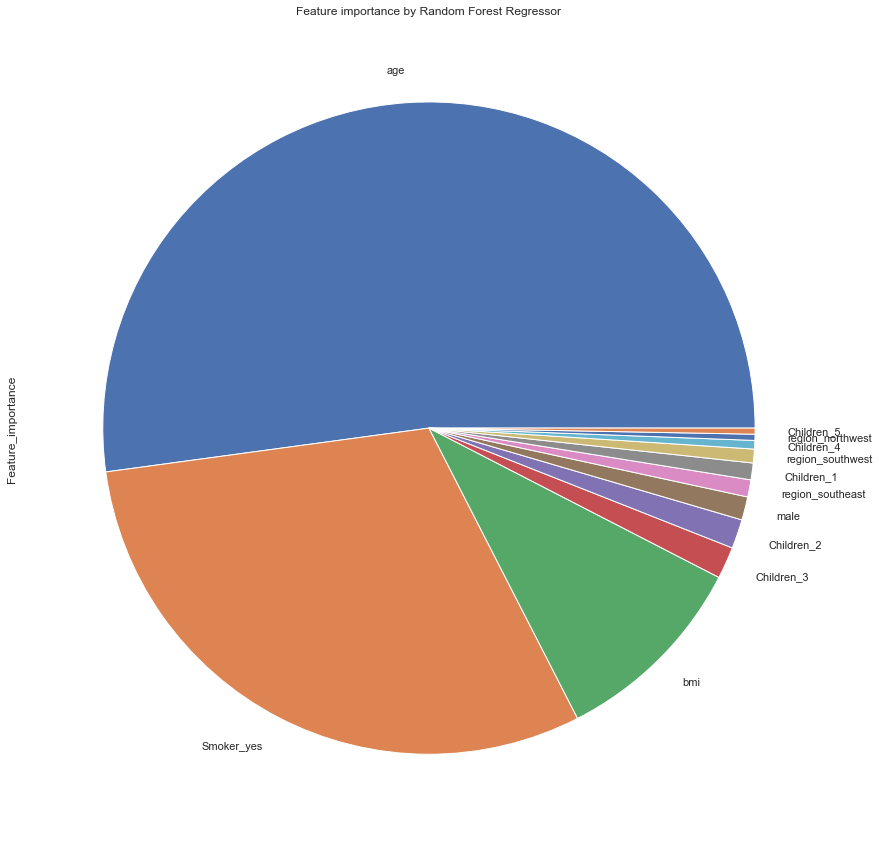

In [125]:
# Visualizing
rf1_feature_imp['Feature_importance'].plot(kind='pie', 
                                           title='Feature importance by Random Forest Regressor', 
                                           figsize=(20,15))
plt.show()

### Inference: 
- Here the last three features are contributing less to the Concrete compressive strength prediction. So, let's drop them and consider only the top 6 features.

In [126]:
features_by_rf = ['age','Smoker_yes','bmi','Children_3','Children_2','male']

In [127]:
# Considering only the above features

X_train_rf = X_train[features_by_rf]
X_test_rf = X_test[features_by_rf]

In [128]:
# instantiating random forest regressor
rf2 = RandomForestRegressor()

#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}

RCV = RandomizedSearchCV(estimator = rf2, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_rf,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [129]:
# Best parameters

RCV.best_params_

{'oob_score': True,
 'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'mae'}

In [130]:
# Best estimator
RCV.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [131]:
# Best score
RCV.best_score_

0.8141154469367262

In [132]:
# Rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
rf2 = RCV.best_estimator_

# Fitting on the training data
rf2.fit(X_train_rf,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [133]:
# Predictions on train data
y_pred_train = rf2.predict(X_train_rf)

In [134]:
# Predictions on test data
y_pred_test = rf2.predict(X_test_rf)

In [135]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rf,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rf,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.867224049096107
Adj. R2 score of train data is  0.8663665079707858
rmse score of train data is  0.3354485120942022

R2 score of test data is  0.8218914575661077
Adj. R2 score of train data is  0.819186011351922
rmse score of test data is  0.3861367487808215


In [136]:
#Updating the results
results.loc[len(results)] = ['Random Forest regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_rf,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_rf,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]

results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045
3,Linear Regression_ElasticNetCV,0.759544,0.756418,0.112093,0.793962,0.787606,0.102043
4,Decision tree regressor,0.832818,0.831557,0.376409,0.819784,0.816582,0.388414
5,Random Forest regressor,0.867224,0.866367,0.335449,0.821891,0.819186,0.386137


## AdaBoost regressor

In [137]:
from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor()

In [138]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1],
          'loss':['linear','square','exponential']}


# randomized search cv
RCV = RandomizedSearchCV(estimator = adb, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1, 
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.5, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [139]:
# Best params
RCV.best_params_

{'n_estimators': 40, 'loss': 'square', 'learning_rate': 0.005}

In [140]:
# Best estimator
RCV.best_estimator_

AdaBoostRegressor(learning_rate=0.005, loss='square', n_estimators=40)

In [141]:
# Best score
RCV.best_score_

0.7943879793862767

In [142]:
# Rebuilding the AdaBoost regressor using the best estimator suggested by the Randomized Search CV
adb1 = rcv.best_estimator_

# Fitting
adb1.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [143]:
# Feature importances
adb1.feature_importances_

adb1_feature_imp = pd.DataFrame(adb1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

adb1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

adb1_feature_imp

,Feature_importance
age,0.517400
Smoker_yes,0.306648
bmi,0.099534
Children_3,0.015737
Children_2,0.015237
male,0.011634
region_southeast,0.007729
Children_1,0.007601
region_southwest,0.007201
Children_4,0.004684


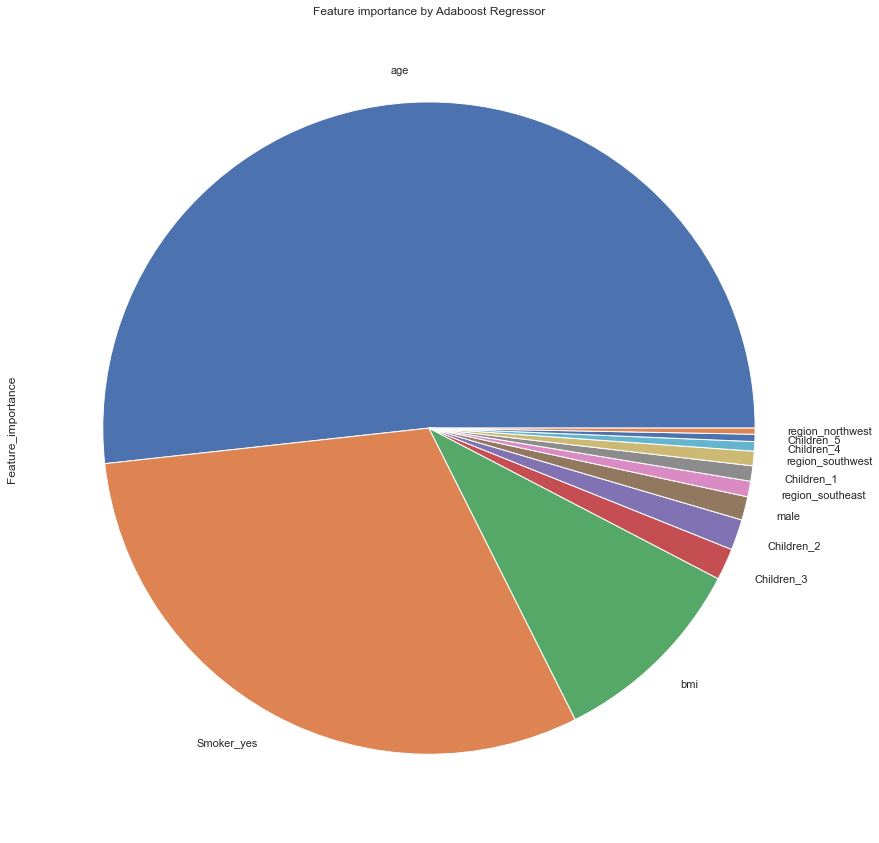

In [144]:
#Visualizing
adb1_feature_imp['Feature_importance'].plot(kind='pie', 
                                            title= 'Feature importance by Adaboost Regressor', 
                                            figsize=(30,15))
plt.show()

### Inference: 
- Here, Children_1, Children_4, Children_5, region_southwest, region_southwest & region_northwest is contributing very less for the prediciton of our target feature. So, let's drop it.

In [145]:
top_features_adb = ['age','Smoker_yes','bmi','Children_3','Children_3','male']

In [146]:
X_train_adb = X_train[top_features_adb]
X_test_adb = X_test[top_features_adb]

In [147]:
adb2 = AdaBoostRegressor()

params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1],
          'loss':['linear','square','exponential']}

# randomized search cv
RCV = RandomizedSearchCV(estimator = adb2, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1, 
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score=True)

RCV.fit(X_train_adb,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.5, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [148]:
# Best score
RCV.best_score_

0.7951481987108204

In [149]:
# Building an adaboost regressor

adb2 = RCV.best_estimator_

In [150]:
# Fitting on the training data

adb2.fit(X_train_adb,y_train)

AdaBoostRegressor(learning_rate=0.001, loss='square', n_estimators=100)

In [151]:
# Predictions on training data

y_pred_train = adb2.predict(X_train_adb)

In [152]:
# Predictions on testing data 
y_pred_test = adb2.predict(X_test_adb)

In [153]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_adb,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_adb,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8061939496184253
Adj. R2 score of train data is  0.804942242080977
rmse score of train data is  0.4052750100257235

R2 score of test data is  0.7931867998522035
Adj. R2 score of train data is  0.7900453335208446
rmse score of test data is  0.4160905841957314


In [154]:
#storing in results
results.loc[len(results)] = ['AdaBoost regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_adb,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_adb,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045
3,Linear Regression_ElasticNetCV,0.759544,0.756418,0.112093,0.793962,0.787606,0.102043
4,Decision tree regressor,0.832818,0.831557,0.376409,0.819784,0.816582,0.388414
5,Random Forest regressor,0.867224,0.866367,0.335449,0.821891,0.819186,0.386137
6,AdaBoost regressor,0.806194,0.804942,0.405275,0.793187,0.790045,0.416091


## Gradient Boosting Regressor

In [155]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

In [156]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.1,0.2,0.5,0.8,1],
          'loss':['lr','lad','huber'],
          'subsample':[0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4,8,10],
          'min_samples_leaf':[1,10,20,50]
         }

#randomized search cv
RCV = RandomizedSearchCV(estimator = gbr, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1,
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score = True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'loss': ['lr', 'lad', 'huber'],
                                        'min_samples_leaf': [1, 10, 20, 50],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [157]:
# Best estimator
RCV.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.8, loss='huber',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=20, subsample=0.9)

In [158]:
# Best parameters
RCV.best_params_

{'subsample': 0.9,
 'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'loss': 'huber',
 'learning_rate': 0.8,
 'criterion': 'mse'}

In [159]:
# Best score
RCV.best_score_

0.8107593626107891

In [161]:
# Building Gradient boosting regressor
gbr1 = RCV.best_estimator_

In [162]:
# Fitting
gbr1.fit(X_train,y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.8, loss='huber',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=20, subsample=0.9)

In [163]:
#feature importances

gbr1_feature_imp = pd.DataFrame(gbr1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
gbr1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
gbr1_feature_imp

,Feature_importance
Smoker_yes,0.526595
age,0.414246
bmi,0.038270
Children_3,0.004395
Children_2,0.003879
Children_5,0.002978
male,0.002605
Children_4,0.002381
region_southwest,0.002066
Children_1,0.001276


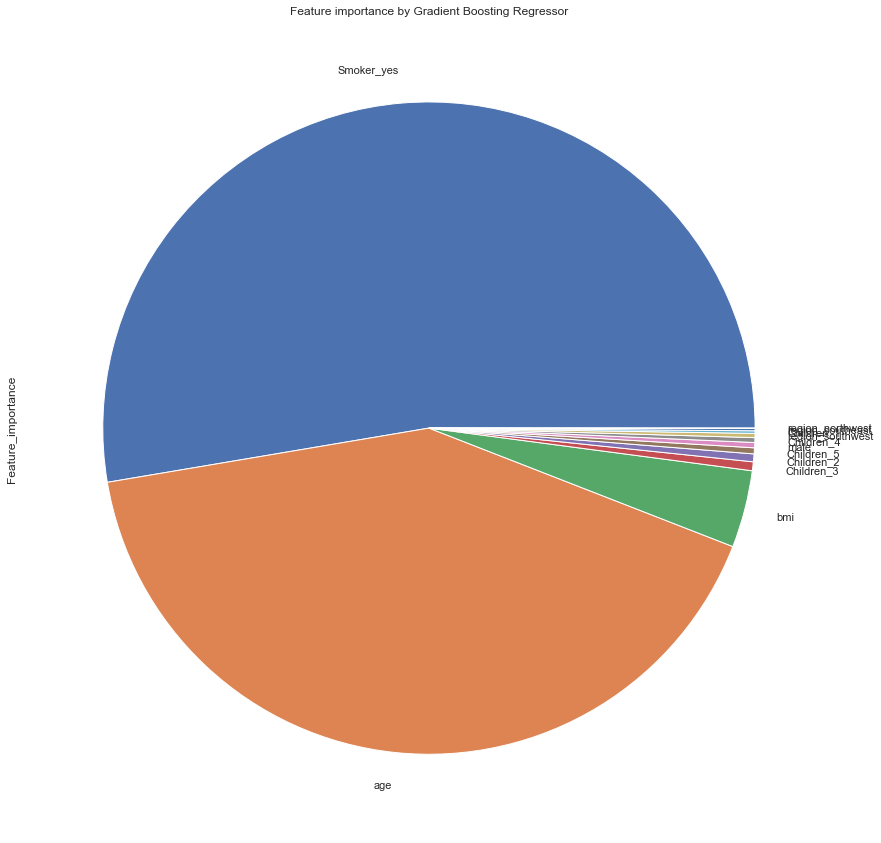

In [165]:
# Visualization
gbr1_feature_imp['Feature_importance'].plot(kind='pie',
                                            title='Feature importance by Gradient Boosting Regressor', 
                                            figsize=(20,15))
plt.show()

### Inference: 
- Here the contribution of the Children_1,region_southeast, region_northwest feature are very low. Let's eliminate them.

In [166]:
top_features_gbr = ['Smoker_yes', 
                    'age',
                    'bmi',
                    'Children_3',
                    'Children_2',
                    'Children_5',
                    'male',
                    'Children_4',
                    'region_southwest']


In [167]:
X_train_gbr = X_train[top_features_gbr]
X_test_gbr = X_test[top_features_gbr]

In [168]:
gbr2 = GradientBoostingRegressor()

params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.1,0.2,0.5,0.8,1],
          'loss':['lr','lad','huber'],
          'subsample':[0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4,8,10],
          'min_samples_leaf':[1,10,20,50]}

#randomized search cv
RCV = RandomizedSearchCV(estimator = gbr2, 
                         param_distributions = params, 
                         n_iter = 10, 
                         scoring = 'r2', 
                         n_jobs = -1,
                         cv = 10, 
                         verbose = 5, 
                         random_state = 42, 
                         return_train_score = True)

RCV.fit(X_train_gbr,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'loss': ['lr', 'lad', 'huber'],
                                        'min_samples_leaf': [1, 10, 20, 50],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [169]:
# Best score
RCV.best_score_

0.8110671399867654

In [170]:
# Best estimator

RCV.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.8, loss='huber',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=20, subsample=0.9)

In [171]:
# Best parameters
RCV.best_params_

{'subsample': 0.9,
 'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'loss': 'huber',
 'learning_rate': 0.8,
 'criterion': 'mse'}

In [172]:
# Building Gradient boosting regressor

gbr2 = rcv.best_estimator_

# Fitting the best estimator on the training data

gbr2.fit(X_train_gbr,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [173]:
# Predictions on train set

y_pred_train = gbr2.predict(X_train_gbr)

In [174]:
# Predictions on test set

y_pred_test = gbr2.predict(X_test_gbr)

In [175]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_gbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_gbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8703085927524703
Adj. R2 score of train data is  0.8690480931139954
rmse score of train data is  0.33152918119654023

R2 score of test data is  0.822340914427151
Adj. R2 score of train data is  0.8182620068502233
rmse score of test data is  0.3856492330319372


In [176]:
# Storing in results
results.loc[len(results)] = ['Gradient Boost regressor',
                             r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_gbr,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_gbr,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045
3,Linear Regression_ElasticNetCV,0.759544,0.756418,0.112093,0.793962,0.787606,0.102043
4,Decision tree regressor,0.832818,0.831557,0.376409,0.819784,0.816582,0.388414
5,Random Forest regressor,0.867224,0.866367,0.335449,0.821891,0.819186,0.386137
6,AdaBoost regressor,0.806194,0.804942,0.405275,0.793187,0.790045,0.416091
7,Gradient Boost regressor,0.870309,0.869048,0.331529,0.822341,0.818262,0.385649


## XGBoost Regressor

In [178]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor()

params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

# Using Randomized search cv
RCV = RandomizedSearchCV(estimator=xgbr, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rat

In [179]:
# Best estimator

RCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=10, min_child_weight=8, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=4,
             reg_lambda=200, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
# Best estimator
RCV.best_params_

{'subsample': 1,
 'reg_lambda': 200,
 'reg_alpha': 4,
 'min_child_weight': 8,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [181]:
# Best score
RCV.best_score_

0.7922736445009967

In [182]:
# Building XGboost regressor with best hyperparameters
xgbr = rcv.best_estimator_

# Fitting on train data
xgbr.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200, oob_score=True)

In [183]:
# feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index = X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
xgbr_feature_imp

,Feature_importance
age,0.520739
Smoker_yes,0.304371
bmi,0.098142
Children_3,0.016185
Children_2,0.014830
male,0.011591
Children_1,0.007773
region_southeast,0.007725
region_southwest,0.007545
Children_4,0.004242


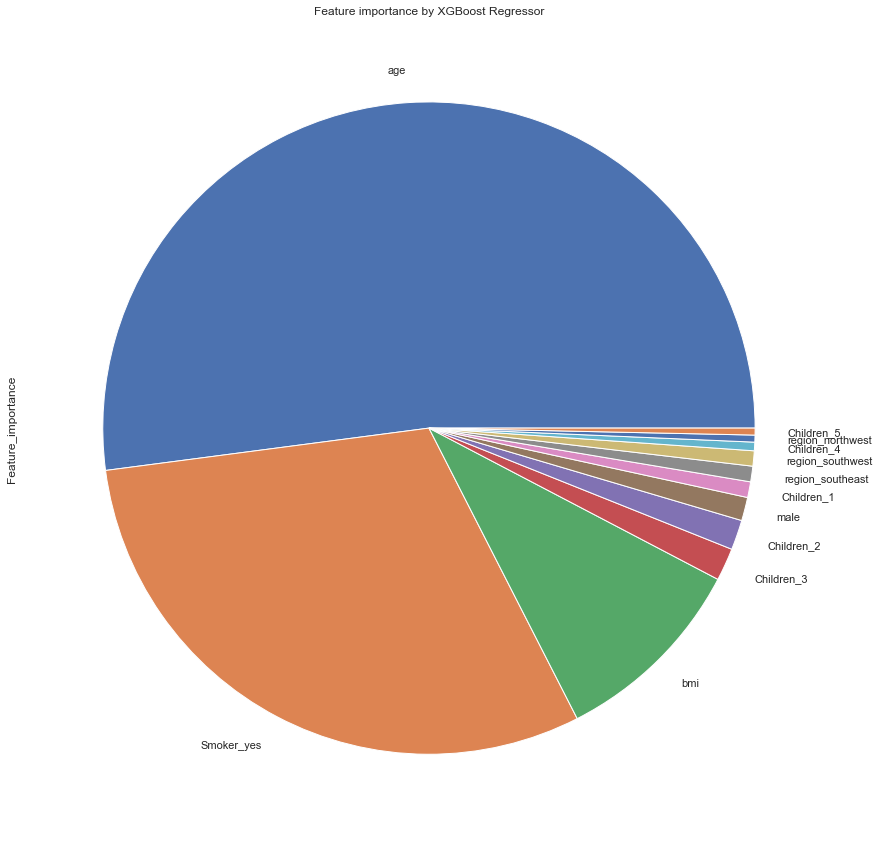

In [185]:
# Visualization
xgbr_feature_imp['Feature_importance'].plot(kind='pie',
                                            title='Feature importance by XGBoost Regressor',
                                            figsize=(20,15))
plt.show()

### Inference:
- Here the last three features are contributing very less for the prediction of the target variable. Let's drop them and rebuild the model.

In [188]:
xgbr_top_features = ['age',
                     'Smoker_yes',
                     'bmi',
                     'Children_3',
                     'Children_2',
                     'male',
                     'Children_1',
                     'region_southeast',
                     'region_southwest']

In [189]:
X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

In [192]:
# Fitting on the training data

xgbr2 = XGBRegressor()

params = {'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]}

#Using Randomized search cv
RCV = RandomizedSearchCV(estimator=xgbr2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_xgbr,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rat

In [193]:
# Best estimator
RCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=4, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [194]:
# Best params
RCV.best_params_

{'subsample': 0.9,
 'reg_lambda': 1000,
 'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [195]:
# Best score
RCV.best_score_

0.7876591195693589

In [196]:
xgbr2 = rcv.best_estimator_

# Fitting

xgbr2.fit(X_train_xgbr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=4, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [197]:
# Predictions on train data

y_pred_train = xgbr2.predict(X_train_xgbr)

In [198]:
# Predictions on test data

y_pred_test = xgbr2.predict(X_test_xgbr)

In [199]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_xgbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_xgbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8099742360039307
Adj. R2 score of train data is  0.8081273333301029
rmse score of train data is  0.4013029971692261

R2 score of test data is  0.8084691302057694
Adj. R2 score of train data is  0.8040717377870243
rmse score of test data is  0.4004222035309762


In [200]:
#storing in results
results.loc[len(results)] = ['XG Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_xgbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_xgbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.758789,0.755917,0.112269,0.793775,0.787959,0.102090
1,Linear Regression_RFE,0.753341,0.751212,0.113530,0.789040,0.784746,0.103255
2,Linear Regression_Lasso,0.759549,0.756423,0.112092,0.793955,0.787599,0.102045
3,Linear Regression_ElasticNetCV,0.759544,0.756418,0.112093,0.793962,0.787606,0.102043
4,Decision tree regressor,0.832818,0.831557,0.376409,0.819784,0.816582,0.388414
5,Random Forest regressor,0.867224,0.866367,0.335449,0.821891,0.819186,0.386137
6,AdaBoost regressor,0.806194,0.804942,0.405275,0.793187,0.790045,0.416091
7,Gradient Boost regressor,0.870309,0.869048,0.331529,0.822341,0.818262,0.385649
8,XG Boost regressor,0.809974,0.808127,0.401303,0.808469,0.804072,0.400422


In [206]:
#saving the final model

import sklearn.externals as extjoblib
import joblib

# Save the model as a pickle in a file
joblib.dump(rf2, r'C:\Users\sushi\Data Science\iNeuron\Internship project\Insurance Premium Prediction update\pickle_files\RandomForest_Regressor_model.pkl')

joblib.dump(gbr2, r'C:\Users\sushi\Data Science\iNeuron\Internship project\Insurance Premium Prediction update\pickle_files\GridentBoosting_Regressor_model.pkl')

['C:\\Users\\sushi\\Data Science\\iNeuron\\Internship project\\Insurance Premium Prediction update\\pickle_files\\GridentBoosting_Regressor_model.pkl']